# Центральная передельная теорема
(Central Limit Theorem)

Данная теорема позволяет нам по особенному описать распределение средних значений выборки.

CLT которая строится на распределении средних значений выборки является нормальным распределением до тех пор пока распределение популяции не будет скошенно в какую либо из сторон или размер выборки будет достаточно велик.

Использование размера выборки равному 30-ти, обычно является хорошим правилом в не завистимости от общего размера популяции. Если распределение популяции явялется нормальный, размер выборки может быть меньше.

Давайте вернемся обратно к нашему набору данных и посмотрим как теорема может быть применена в данном случае.

Посмотрите на скошенный график ниже, он представляет собой распределение скошенное вправо, так как имеется хвост с правой стороны.

![3_1](img/3_1.png)

Далее мы симулировали распределение средних значений выборки (используя размер выборки 100) и наложи поверх него нормальное распределение. Обратите внимание как гистограмма следует кривой нормального распределения

![3_2](img/3_2.png)

*Очень важно помнить что CLT применяется только для распределения средних значений для других переменных она не подойдет*

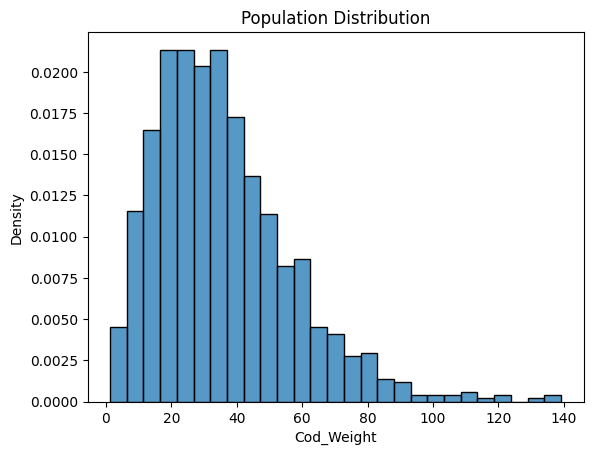

In [2]:
# импортируем библиотеки
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

# загрузим данные в переменную
cod_population = pd.read_csv('cod_population.csv')
# загрузим данные веса тунца в другую перменную
population = cod_population.Cod_Weight
# Выведем график распределения данных
sns.histplot(population, stat = 'density' )
plt.title("Population Distribution")
plt.show()

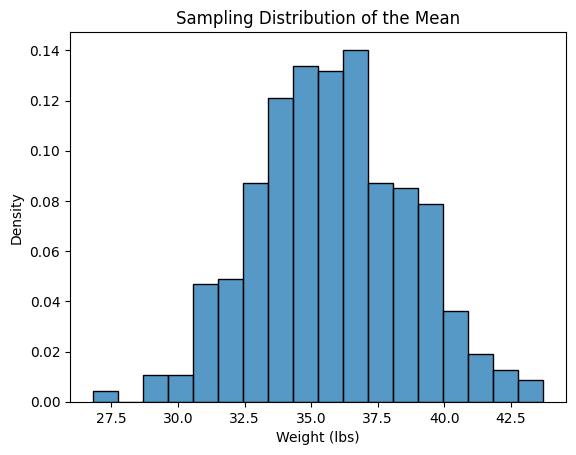

In [6]:
# создаем список средних значений выборок
sample_means = []
# укажем размер выборки
samp_size = 50

for i in range(500):
    samp = np.random.choice(population, samp_size, replace = False)
    this_sample_mean = np.mean(samp)
    sample_means.append(this_sample_mean)

plt.clf() # this closes the previous plot
sns.histplot(sample_means, stat = 'density' )
plt.title("Sampling Distribution of the Mean")
plt.xlabel("Weight (lbs)")
plt.show()

## CLT продолжение

CLT не только устанавливает, что распределение выборки будет нормально распределено, но и позволяет нам количественно описать это нормальное распределение. Нормальное распределение описывается средним значением и стандартным отклонением.

Попробуем в этом разобраться:
- Выберем выборку размером n
- Учитывая что n достаточно велико (n > 30), распределение выборки средних значений будет нормально распределено с
    - средним значением x приблизительно равному среднему значению популяции
    - стандартное отклонение стандартному отклонению популяции

Давайте также рассмотрим эти моменты на примере популяции тунца.

На графиках распределния популяции и средних значений выборки видно что их средние значения приближены друг к другу

![3_3](img/3_3.png)

![3_4](img/3_4.png)

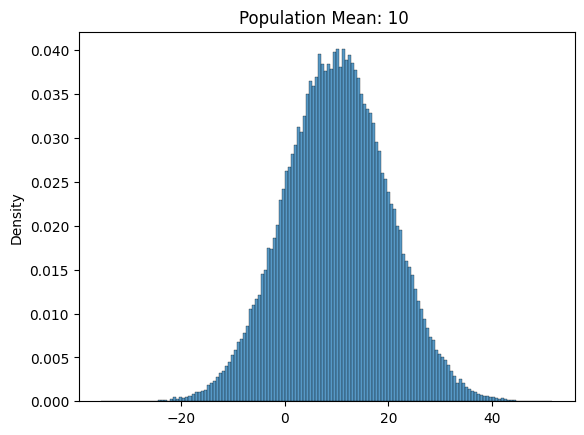

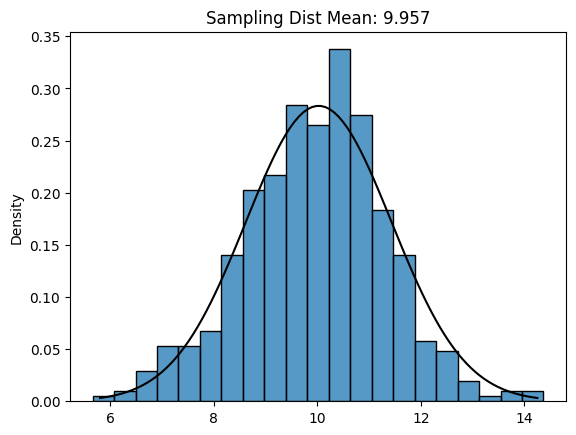

In [9]:
# Испортируем библиотеки
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# создаем переменные
population_mean = 10 # среднее значение популяции
population_std_dev = 10 # стандартное отклонение
# переменная размера выборки
samp_size = 50
# создаем переменную популяции из случайных значений с указанием параметров распределения
population = np.random.normal(population_mean, population_std_dev, size=100000)
# создаем список средних значений выборок
sample_means = []
# создаем цикл из 500 иттераций
for i in range(500):
    samp = np.random.choice(population, samp_size, replace=False)
    sample_means.append(samp.mean())

# создаем переменную которая будет хранить среднее значение средних выборки
mean_sampling_distribution = round(np.array(sample_means).mean(),3)

# создадим график распределения популяции
sns.histplot(population, stat = 'density')
plt.title(f"Population Mean: {population_mean} ")
plt.xlabel("")
plt.show()
plt.clf()

# создадим график распределения средних значений
sns.histplot(sample_means, stat='density')
# calculate the mean and SE for the probability distribution
mu = np.mean(population)
sigma = np.std(population)/(samp_size**.5)
# plot the normal distribution with mu=popmean, sd=sd(pop)/sqrt(samp_size) on top
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)

plt.plot(x, stats.norm.pdf(x, mu, sigma), color='k', label = 'normal PDF')
plt.title(f"Sampling Dist Mean: {mean_sampling_distribution}")
plt.xlabel("")
plt.show()